In [1]:
import pickle
import seaborn as sns

In [2]:
with open("measure-barzur.pkl", "rb") as pkl:
    load = pickle.load(pkl)
    their = load["their"]
    our = load["our"]
    data = load["data"]

print("their:", their["model"], their["mdp"], sep="\n")
print()
print("our:", our["model"], our["mdp"], sep="\n")
data

their:
barzur20aft.Bitcoin(alpha=0.125, gamma=0.25, maximum_fork_length=5)
MDP of size 74 / 4 / 258 / 3.5

our:
sm.SelfishMining(Bitcoin(), alpha=0.125, gamma=0.25, maximum_height=5, maximum_size=0, force_consider_own=True)
MDP of size 2220 / 3 / 9050 / 4.1


,alpha,gamma,horizon,value_eps,model,vi_start_value,vi_iter,vi_time
0,0.35,1.0,100,0.01,their,49.234157,722,0.136660
1,0.35,1.0,100,0.01,our,48.827435,751,4.514071
2,0.30,0.5,200,0.01,their,59.918369,1152,0.227018
3,0.30,0.5,200,0.01,our,59.618459,1206,7.810074
4,0.20,1.0,100,0.01,their,22.737928,533,0.130622
...,...,...,...,...,...,...,...,...
175,0.35,0.5,200,0.01,our,75.861863,1355,7.813061
176,0.05,1.0,200,0.01,their,6.445034,388,0.090102
177,0.05,1.0,200,0.01,our,6.439261,389,2.592442
178,0.00,0.0,200,0.01,their,0.000000,6,0.003004


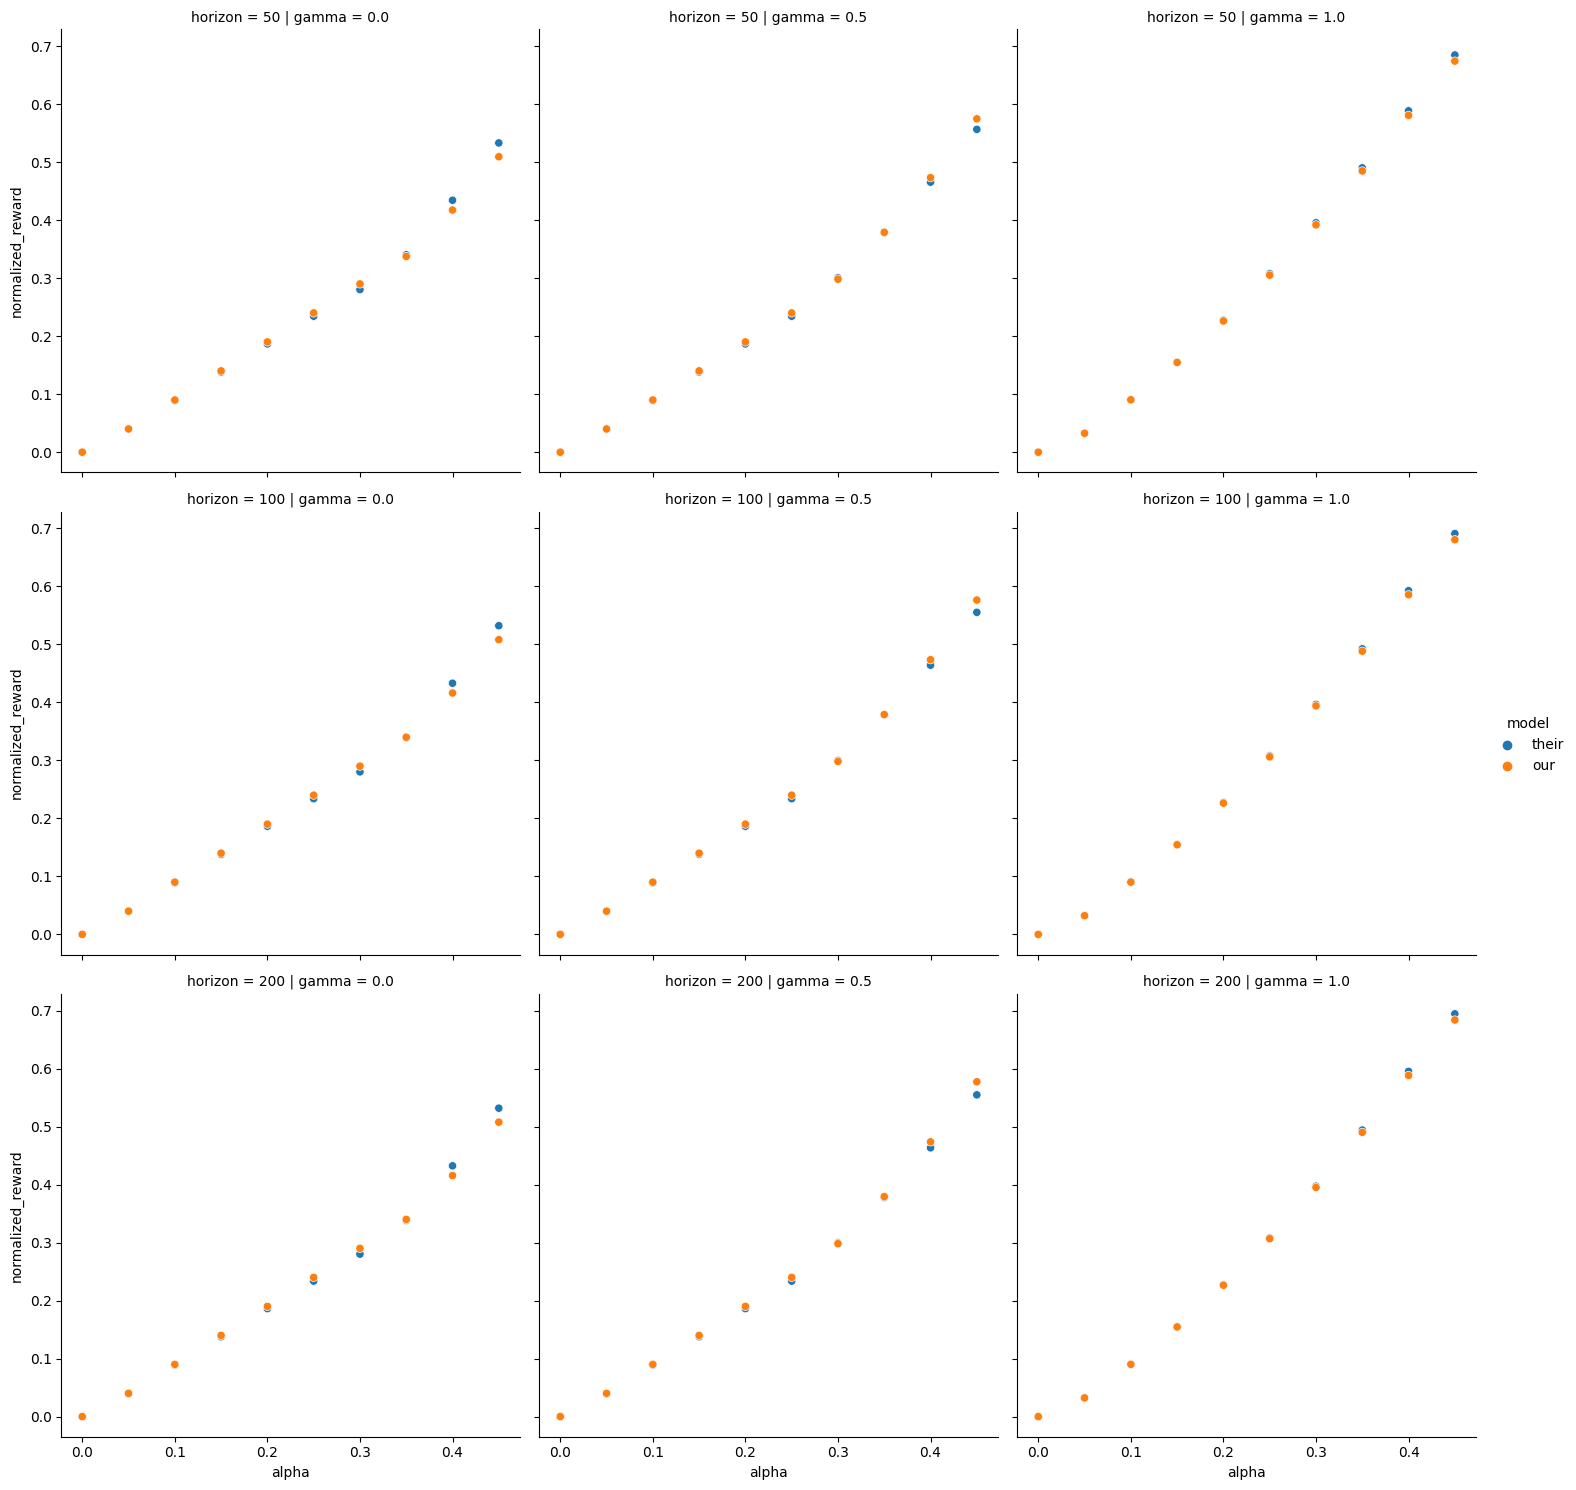

In [3]:
# Compare model w.r.t. reward
sns.relplot(
    data.assign(normalized_reward=lambda x: x.vi_start_value / x.horizon),
    x="alpha",
    y="normalized_reward",
    col="gamma",
    row="horizon",
    hue="model",
)

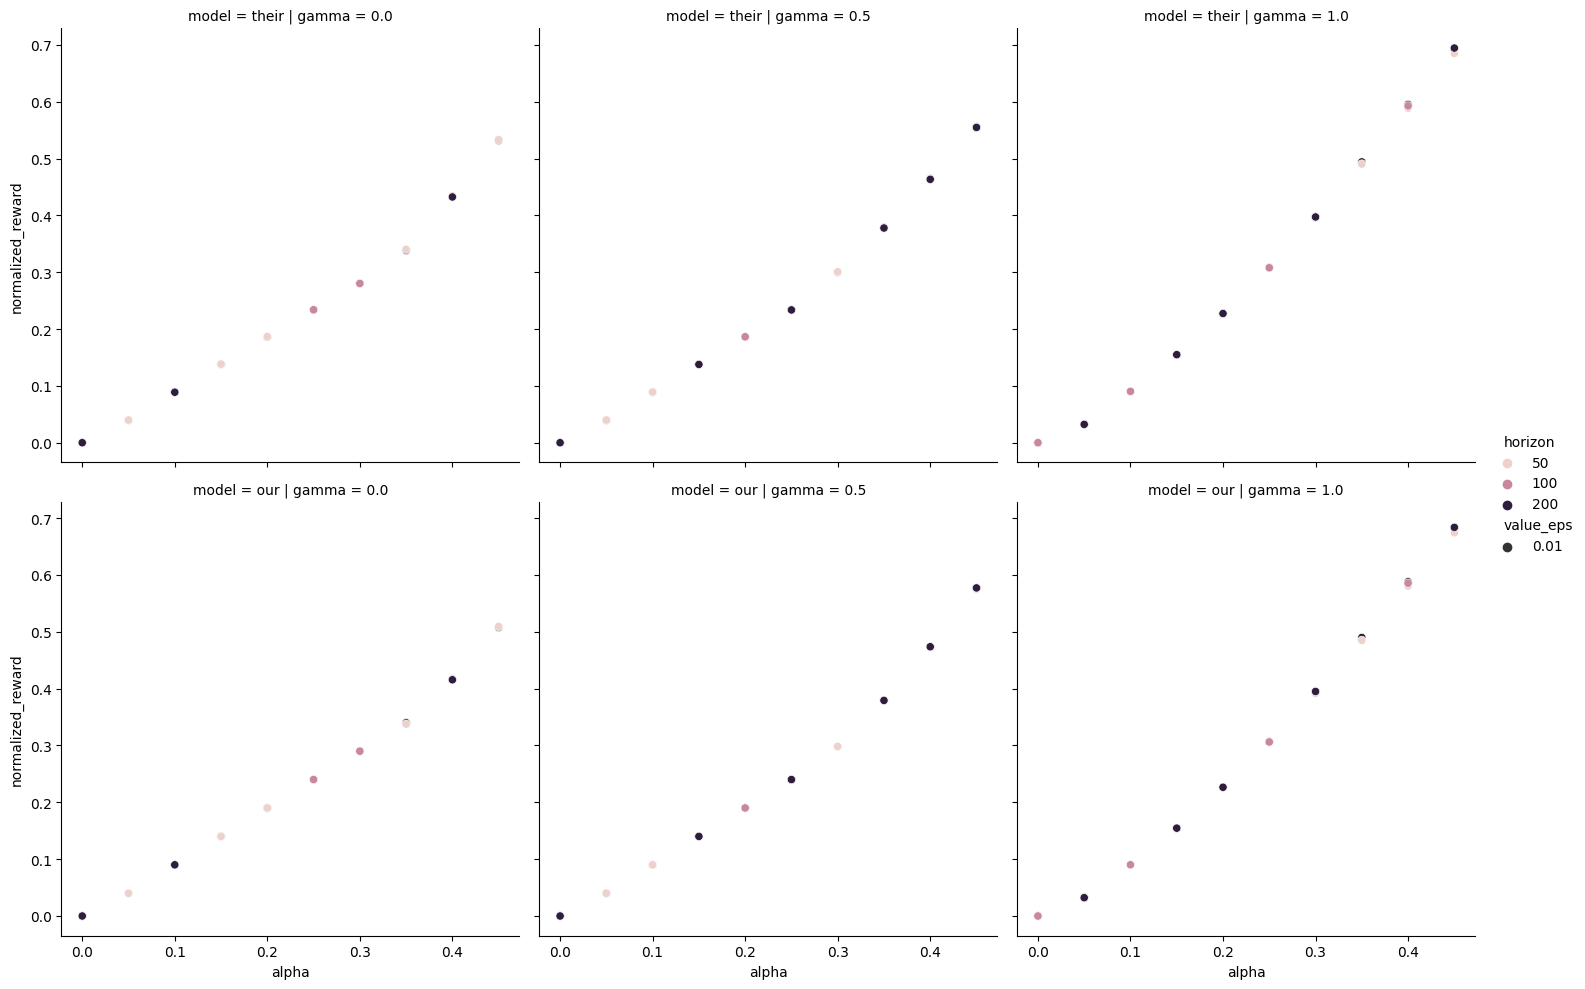

In [4]:
# Demonstrate effect of horizon
sns.relplot(
    data.assign(normalized_reward=lambda x: x.vi_start_value / x.horizon),
    x="alpha",
    y="normalized_reward",
    col="gamma",
    row="model",
    hue="horizon",
    style="value_eps",
)

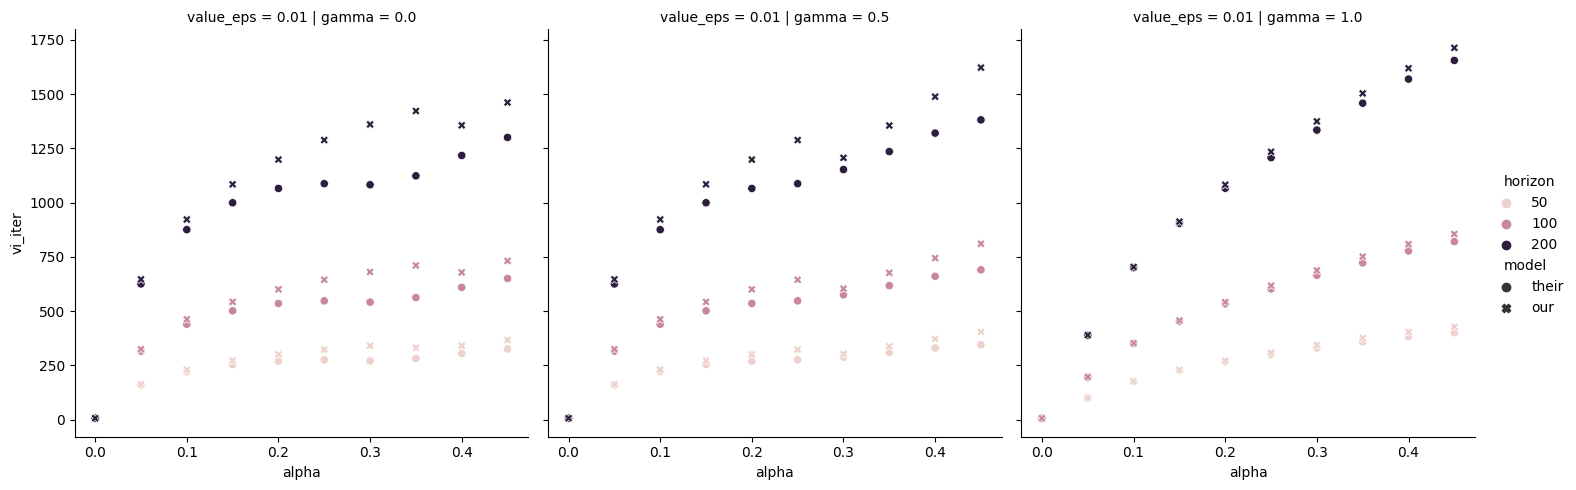

In [5]:
# Visualize number iterations required in value iteration
# It's intersting that the models behave so similar!
sns.relplot(
    data,
    x="alpha",
    y="vi_iter",
    col="gamma",
    hue="horizon",
    row="value_eps",
    style="model",
)

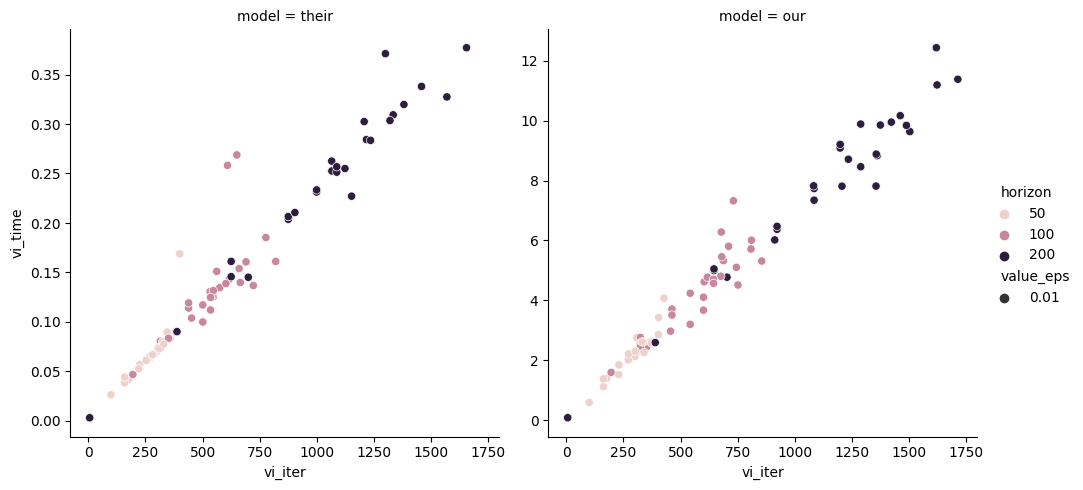

In [6]:
# Visualize solving time
# Naturally, the smaller model can be iterated much faster
sns.relplot(
    data,
    x="vi_iter",
    y="vi_time",
    hue="horizon",
    style="value_eps",
    col="model",
    facet_kws=dict(sharey=False),
)